In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv(r'D:\database\exercise\ex1data1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.tail()

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [7]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


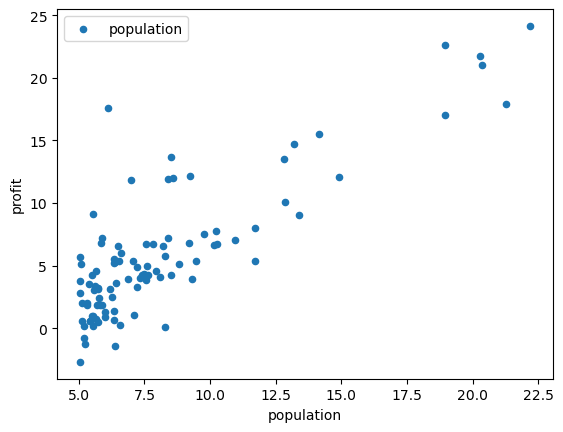

In [9]:
data.plot.scatter('population','profit',label='population')
plt.show()

In [10]:
data.insert(0,'ones',1)#插入一列
data.head()
#特征值第一第二列，标签值最后一列

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [12]:
X=data.iloc[:,0:-1]#所有行，和零到倒数第二列
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [13]:
y=data.iloc[:,-1]
y.head()
#是dataframe的结构，不是数组结构

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [14]:
X=X.values#获取values

In [15]:
X.shape()#检查向量维度

(97, 2)

In [16]:
y=y.values

In [17]:
y.shape

(97,)

In [18]:
#损失函数的定义
y=y.reshape(97,1)
y.shape

(97, 1)

In [19]:
def costFunction(X,y,theta):
    inner=np.power(X@theta-y,2)#矩阵相乘
    return np.sum(inner)/(2*len(X))

In [20]:
theta=np.zeros((2,1))#theta维度与y相同
theta.shape

(2, 1)

In [21]:
cost_init=costFunction(X,y,theta)
print(cost_init)

32.072733877455676


In [24]:
def gradientDescent(X,y,theta,alpha,iters):
    costs=[]#空列表储存所有的损失函数
    
    for i in range(iters):
        theta=theta-(X.T@(X@theta-y))*alpha/len(X)
        cost=costFunction(X,y,theta)
        costs.append(cost)
        
        if i%100==0:
            print(cost)
    return theta,costs#返回一个元组，两个元素

In [25]:
#学习率的设定
alpha=0.02
iters=2000
theta,costs=gradientDescent(X,y,theta,alpha,iters)

16.76964237166745
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403549
4.5155489085988645
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414093
4.478013190619409
4.477477295755764
4.477217057705424
4.477090682463859
4.477029312876824
4.476999510945953
4.476985038710984
4.476978010791016
4.476974597934662
4.476972940603823


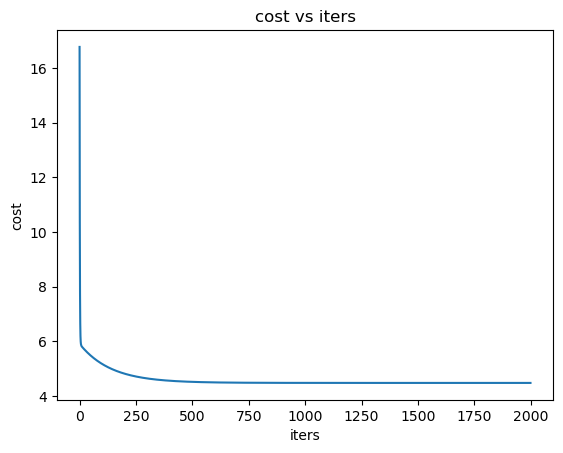

In [32]:
fig,ax=plt.subplots()#绘图，实例,打印代价函数
ax.plot(np.arange(iters),costs)
ax.set(xlabel='iters',
    ylabel='cost',
    title='cost vs iters')
plt.show()

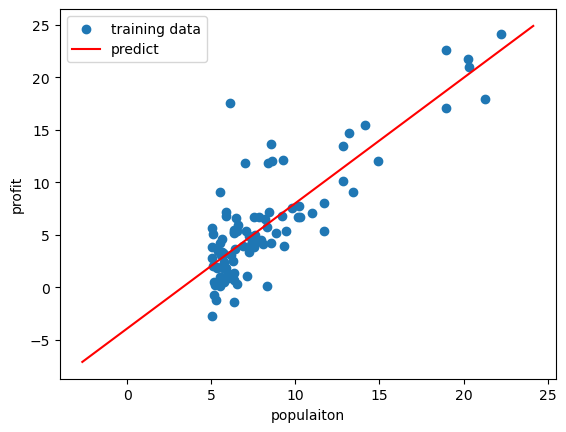

In [37]:
#获取斜率和偏移量
x = np.linspace(y.min(),y.max(),100)
y_ = theta[0,0] + theta[1,0] * x


fig,ax = plt.subplots()
ax.scatter(X[:,1],y,label='training data')#散点图
ax.plot(x,y_,'r',label='predict')
ax.legend()
ax.set(xlabel='populaiton',
      ylabel='profit')
plt.show()


In [38]:
theta

array([[-3.8928815 ],
       [ 1.19274237]])